 # Haberman cancer survival

##### Description about dataset from Kaggle:

Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

### Objective

To classify/predict a patient survival who had undergone surgery for breast cancer.

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [65]:
data = pd.read_csv('haberman.csv')

In [66]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [67]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [68]:
data.shape

(306, 4)

There are 306 rows and 4 columns in this dataset

In [7]:
data.status.value_counts()

1    225
2     81
Name: status, dtype: int64

225 people are survived whereas 81 people died



# Bivariate Analysis


## Pair plot

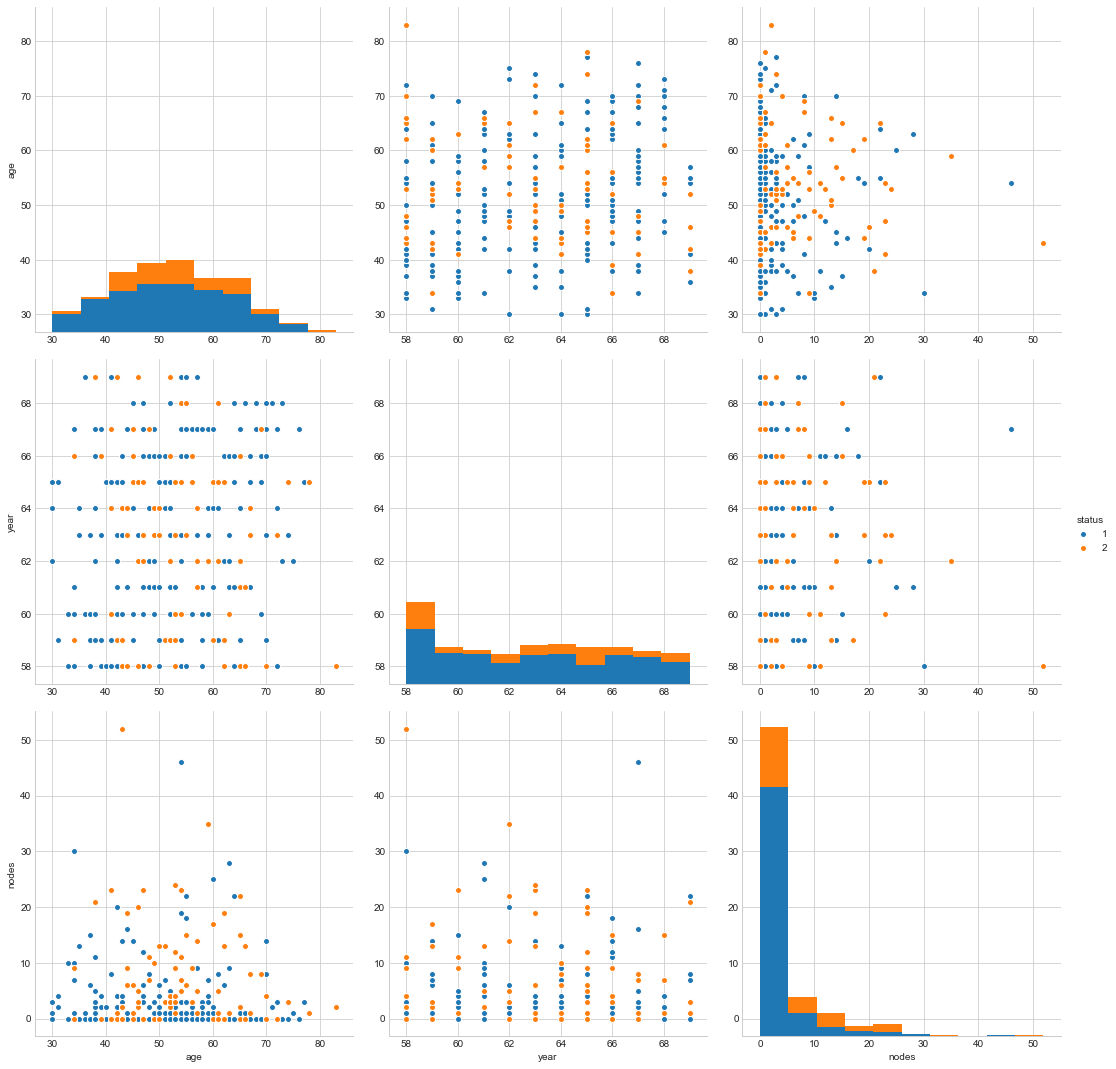

In [74]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="status",vars=['age','year','nodes'] ,size=5);
plt.show()

1. Nodes with age shows some relationship but very little.
2. Nodes with year doesn't make any sense
3. Age with year also not showing any relationship

Let's check them in more detail in Univariate analysis

# Univariate Analysis

## 1.Histogram with PDF

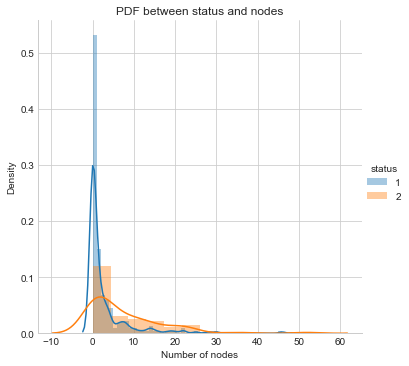

In [42]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();

plt.title("PDF between status and nodes")
plt.xlabel("Number of nodes")
plt.ylabel("Density")
plt.show();

Seems like nodes have strong connection with survival status. We can see there are very less nodes among survived people and more among non-survived people. Let's compare status with age and year to get big picture.

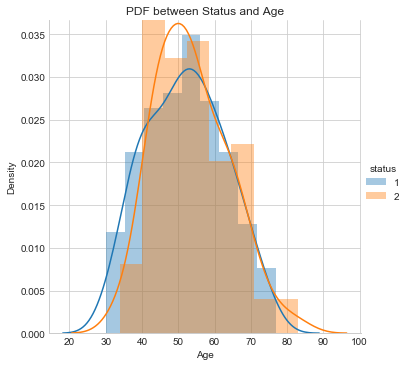

In [43]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();

plt.title("PDF between Status and Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show();

Almost similar PDF for both survived and non-survived people when compared with age. Seems like age doesn't have much impact on survival status.

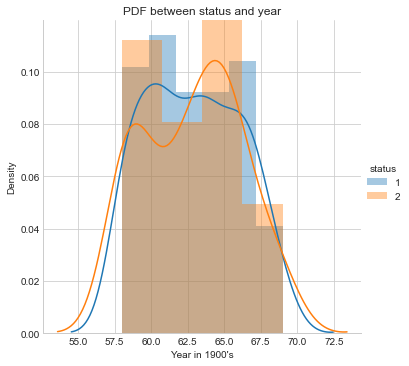

In [44]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();

plt.title("PDF between status and year")
plt.xlabel("Year in 1900's")
plt.ylabel("Density")
plt.show();

Almost similar PDF for both survived and non-survived people when compared with year too. Looks like year also doesn't have much impact on survival status.



Let's checkout the relation between them in more detail with boxplots and violin plots.


## 2.Box-Plot

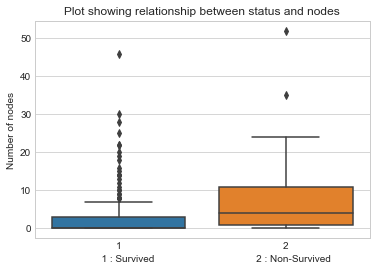

In [30]:
sns.boxplot(x='status',y='nodes', data=data)
plt.title("Plot showing relationship between status and nodes")
plt.xlabel("          1 : Survived                                     2 : Non-Survived")
plt.ylabel("Number of nodes")
plt.show()

From the above figure, it can be concluded that survived people mostly have very less number of nodes having less than 4 as per 75 percentile and 50th percentile very close to 0. For non-survived people the 75th percentile is above 10 and 50th percentile close to 5. Number of nodes have significant impact on survival status.

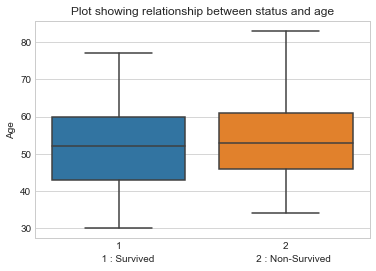

In [31]:
sns.boxplot(x='status',y='age', data=data)
plt.title("Plot showing relationship between status and age")
plt.xlabel("          1 : Survived                                     2 : Non-Survived")
plt.ylabel("Age")
plt.show()

The quantiles of both survived and non-survived have similar range. Seems like age doesn't have much impact in deciding the survival status. Age alone cannot decide survival status.

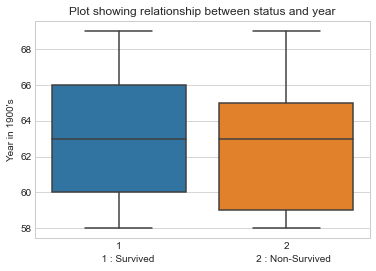

In [32]:
sns.boxplot(x='status',y='year', data=data)
plt.title("Plot showing relationship between status and year")
plt.xlabel("          1 : Survived                                     2 : Non-Survived")
plt.ylabel("Year in 1900's")
plt.show()

Same situation here. The quantiles of both survived and non-survived have very similar range. So, year also doesn't have much impact in deciding the survival status. Year alone cannot decide survival status.

Even the boxplots shows Nodes and survival status are strongly linked and huge overlap of age and year with status

## 3.Violin Plot

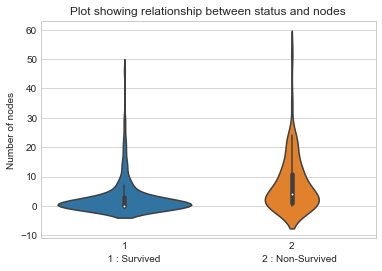

In [27]:
sns.violinplot(x="status", y="nodes", data = data, size=8)
plt.title("Plot showing relationship between status and nodes")
plt.xlabel("          1 : Survived                                     2 : Non-Survived")
plt.ylabel("Number of nodes")
plt.show()

From the above figure, it can be concluded that survived people mostly have very less number of nodes having less than 4 as per 75 percentile and 50th percentile very close to 0 (and more spread here).
For non-survived people the 75th percentile is above 10 and 50th percentile close to 5.
Number of nodes have significant impact on survival status.

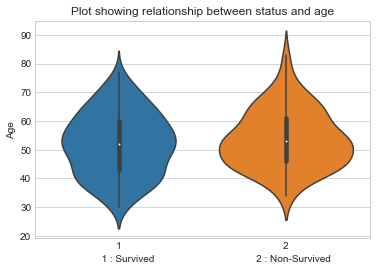

In [28]:
sns.violinplot(x="status", y="age", data = data, size=8)
plt.title("Plot showing relationship between status and age")
plt.xlabel("          1 : Survived                                     2 : Non-Survived")
plt.ylabel("Age")
plt.show()

The quantiles of both survived and non-survived have similar range. Spread is also looking similar. So, age doesn't have much impact in deciding the survival status. Age alone cannot decide survival status.

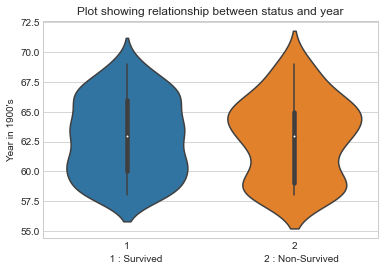

In [29]:
sns.violinplot(x="status", y="year", data = data, size=8)
plt.title("Plot showing relationship between status and year")
plt.xlabel("          1 : Survived                                     2 : Non-Survived")
plt.ylabel("Year in 1900's")
plt.show()

Same situation here. The quantiles of both survived and non-survived have almost similar range. So, year also doesn't have much impact in deciding the survival status. Year alone cannot decide survival status.

Same result with Violin plots too


Hence, its clear. Nodes are strongly connected to survival status.

# Some basic statistics

In [45]:
data_1 = data.loc[data["status"]==1]
data_2 = data.loc[data["status"]==2]

In [46]:
print("Means:")
print(np.mean(data_1["nodes"]))
print(np.mean(data_2["nodes"]))


print("\nStd-dev:");
print(np.std(data_1["nodes"]))
print(np.std(data_2["nodes"]))


print("\nQuantiles:")
print(np.percentile(data_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(data_2["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(data_1["nodes"],90))
print(np.percentile(data_2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation") 
print(robust.mad(data_1["nodes"]))
print(robust.mad(data_2["nodes"]))


Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


##### Considering above details
 1. Mean is about 2.79 for survived and 7.45 for died. So more nodes in non-survived people.
 2. As per quantiles, the conclusion is same:more nodes in non-survived people.

## PDF and CDF

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


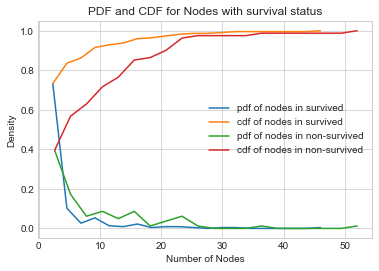

In [56]:
counts, bin_edges = np.histogram(data_1['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(data_2['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
label=["pdf of nodes in survived", "cdf of nodes in survived", "pdf of nodes in non-survived", "cdf of nodes in non-survived"]
plt.legend(label)
plt.title("PDF and CDF for Nodes with survival status")
plt.xlabel("Number of Nodes")
plt.ylabel("Density")
plt.show()

As expected, the PDF and CDF graphs shows strong connection between nodes and survival status. 75% of survived people have less than 4 nodes, whereas for 75% among non-survived people, there are about 12 nodes.

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


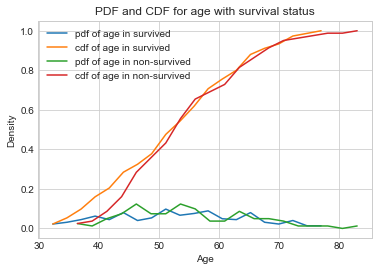

In [59]:
counts, bin_edges = np.histogram(data_1['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(data_2['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
label=["pdf of age in survived", "cdf of age in survived", "pdf of age in non-survived", "cdf of age in non-survived"]
plt.legend(label)
plt.title("PDF and CDF for age with survival status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

The above figure shows no strong relation between age and survival status. Almost similar age values for both survived and non-survived.

[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
[0.14814815 0.11111111 0.         0.04938272 0.         0.03703704
 0.         0.08641975 0.         0.09876543 0.09876543 0.
 0.16049383 0.         0.07407407 0.         0.04938272 0.
 0.03703704 0.04938272]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


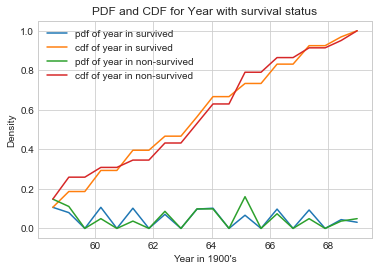

In [60]:
counts, bin_edges = np.histogram(data_1['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(data_2['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
label=["pdf of year in survived", "cdf of year in survived", "pdf of year in non-survived", "cdf of year in non-survived"]
plt.legend(label)
plt.title("PDF and CDF for Year with survival status")
plt.xlabel("Year in 1900's")
plt.ylabel("Density")
plt.show()

The above figure shows no strong relation between year and survival status. Almost similar Year values for both survived and non-survived.

# Conclusion


1.After doing necessary EDA, it is clear that Nodes are strongly connected to people survival status. However there are some people who survived even though more positive nodes detected and some died even if they are very low.

2.Age and year doesn't have impact on survival.